In [ ]:
pip install yfinance pandas matplotlib numpy


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

List of assets

In [ ]:
tickers = ['BTC-USD', 'AAPL', 'MSFT', 'TSLA', 'GOOG', 'AMZN']

In [ ]:
# Download daily adjusted closing prices for 2024
data = yf.download(tickers, start='2024-01-01', end='2024-11-30')["Close"]


[*********************100%***********************]  6 of 6 completed


In [ ]:
returns = data.pct_change(fill_method=None).dropna()



In [ ]:
# Cumulative return = product of (1 + return)
cumulative_returns = (1 + returns).cumprod() * 10000



In [ ]:
# Initialize dictionary to store metrics
metrics = {}

for ticker in tickers:
    daily_ret = returns[ticker]
    cum_ret = cumulative_returns[ticker].iloc[-1] - 1
    volatility = daily_ret.std()
    sharpe = daily_ret.mean() / volatility
    drawdown = (cumulative_returns[ticker] / cumulative_returns[ticker].cummax()) - 1
    max_drawdown = drawdown.min()

    metrics[ticker] = {
        'Total Return (%)': cum_ret * 100,
        'Volatility': volatility,
        'Sharpe Ratio': sharpe,
        'Max Drawdown': max_drawdown
    }

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics).T.round(4)
print(metrics_df)


         Total Return (%)  Volatility  Sharpe Ratio  Max Drawdown
BTC-USD      1.297157e+06      0.0305        0.0624       -0.3442
AAPL         1.271026e+06      0.0140        0.1022       -0.1025
MSFT         1.157711e+06      0.0131        0.0687       -0.1428
TSLA         9.873124e+05      0.0397        0.0175       -0.3824
GOOG         1.133772e+06      0.0166        0.0502       -0.1885
AMZN         1.418974e+06      0.0188        0.1129       -0.1684


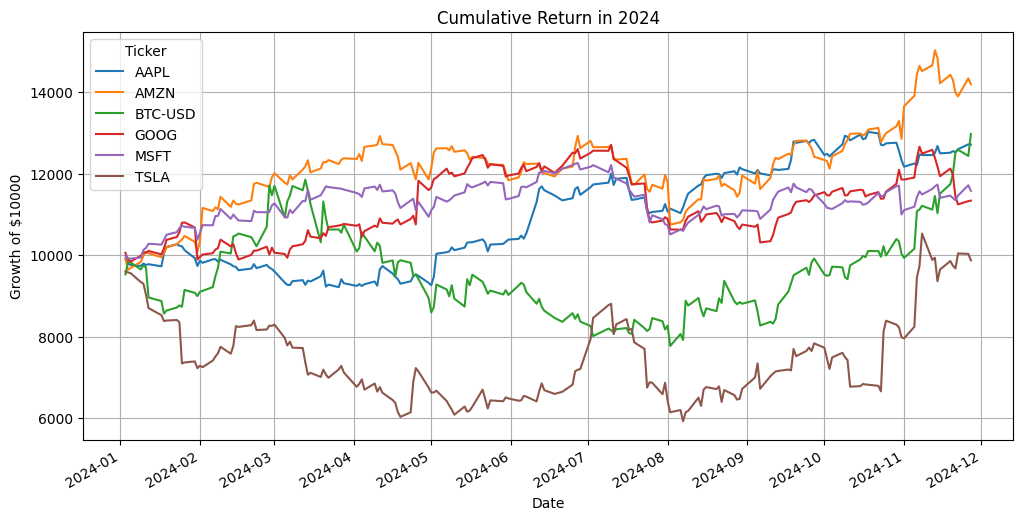

In [ ]:
cumulative_returns.plot(figsize=(12, 6), title='Cumulative Return in 2024')
plt.xlabel("Date")
plt.ylabel("Growth of $10000")
plt.grid(True)
plt.show()


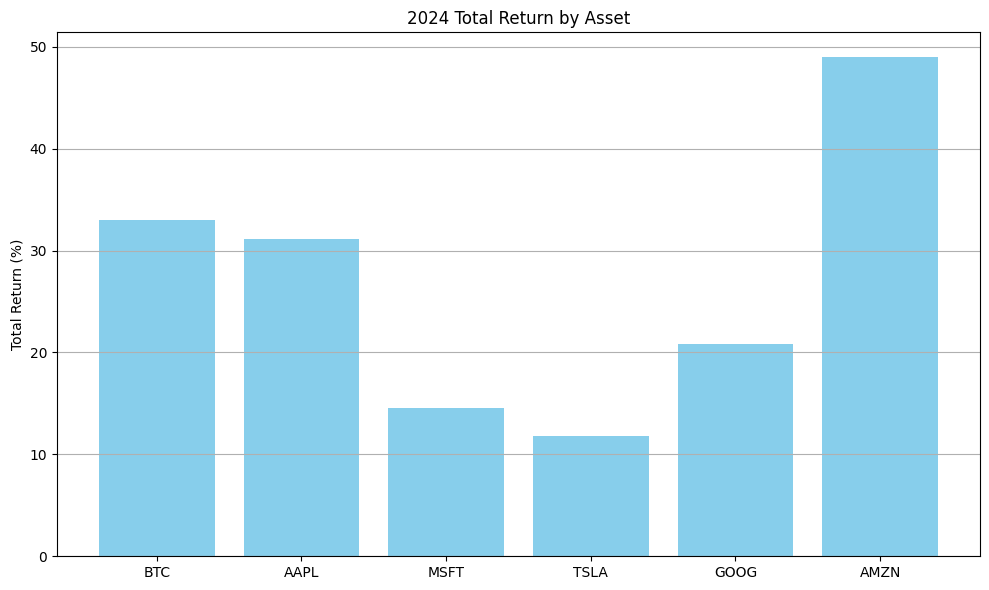

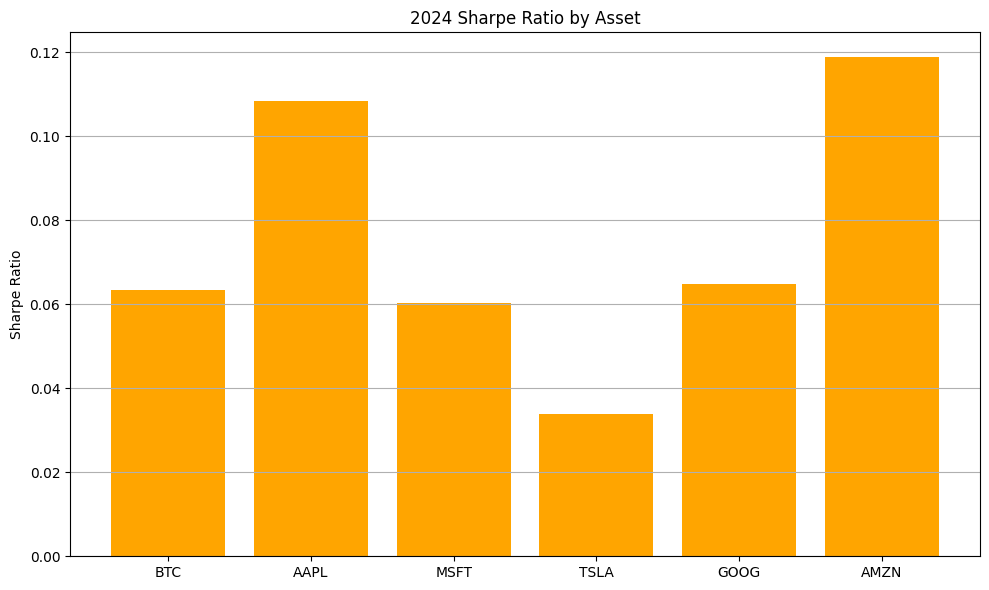

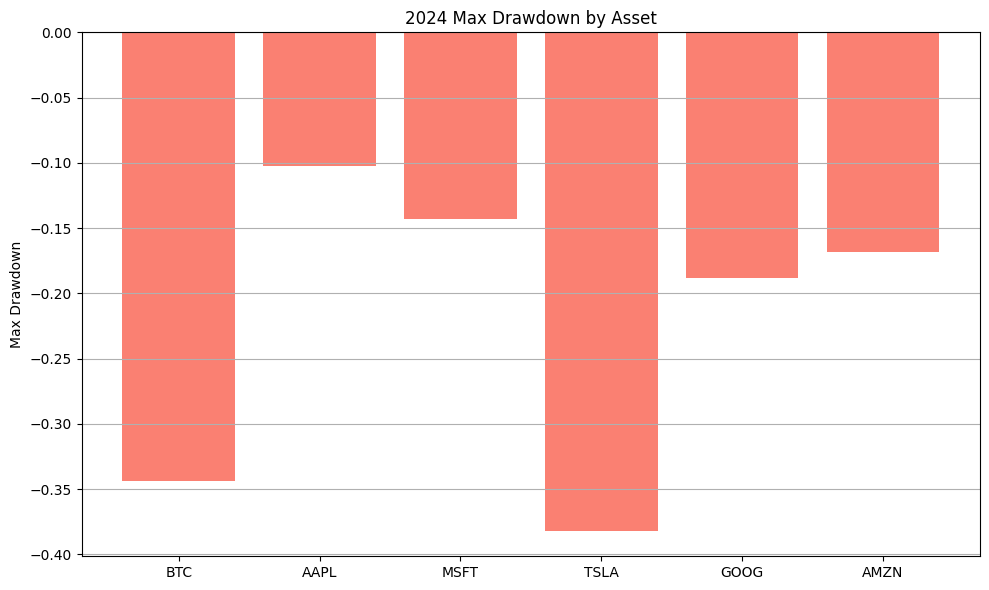

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Recreate data after environment reset
data = {
    'Asset': ['BTC', 'AAPL', 'MSFT', 'TSLA', 'GOOG', 'AMZN'],
    'Total Return (%)': [32.98, 31.09, 14.60, 11.77, 20.81, 48.97],
    'Volatility': [0.0304, 0.0138, 0.0131, 0.0400, 0.0173, 0.0188],
    'Sharpe Ratio': [0.0634, 0.1083, 0.0602, 0.0339, 0.0648, 0.1188],
    'Max Drawdown': [-0.3442, -0.1025, -0.1428, -0.3824, -0.1885, -0.1684]
}
df = pd.DataFrame(data)

# Plot Total Return
plt.figure(figsize=(10, 6))
plt.bar(df['Asset'], df['Total Return (%)'], color='skyblue')
plt.title('2024 Total Return by Asset')
plt.ylabel('Total Return (%)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plot Sharpe Ratio
plt.figure(figsize=(10, 6))
plt.bar(df['Asset'], df['Sharpe Ratio'], color='orange')
plt.title('2024 Sharpe Ratio by Asset')
plt.ylabel('Sharpe Ratio')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plot Max Drawdown
plt.figure(figsize=(10, 6))
plt.bar(df['Asset'], df['Max Drawdown'], color='salmon')
plt.title('2024 Max Drawdown by Asset')
plt.ylabel('Max Drawdown')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


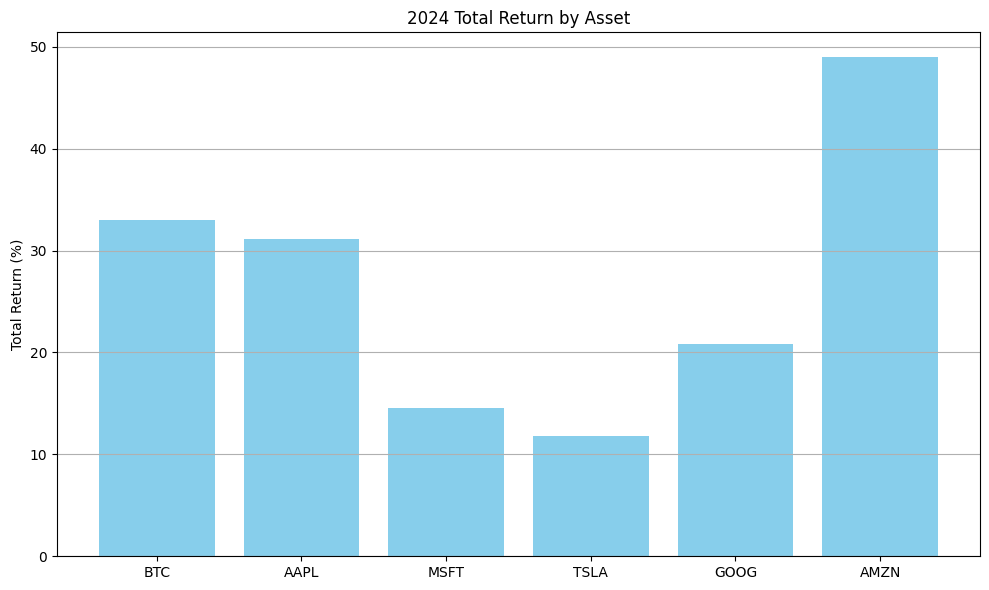

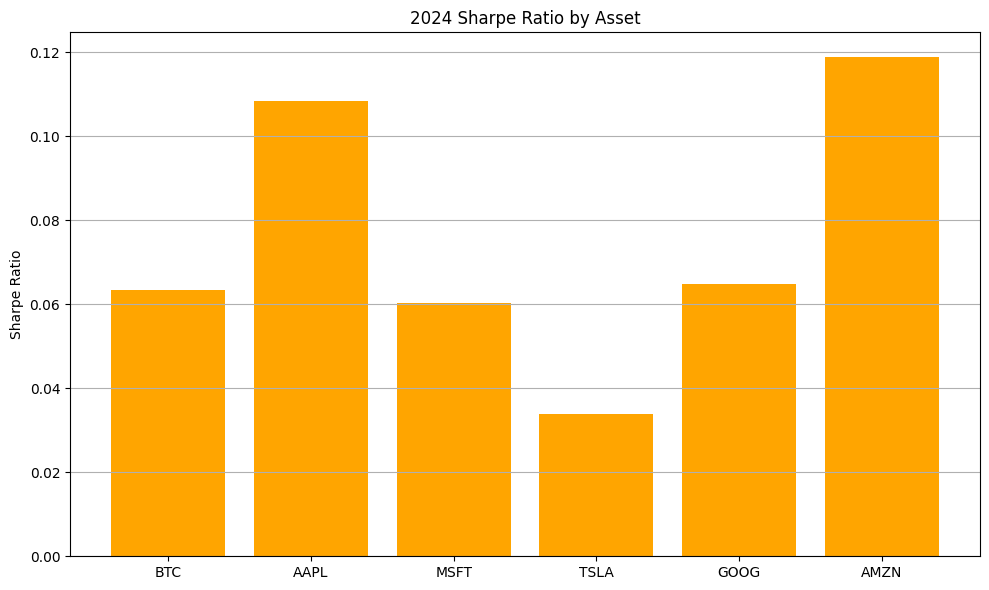

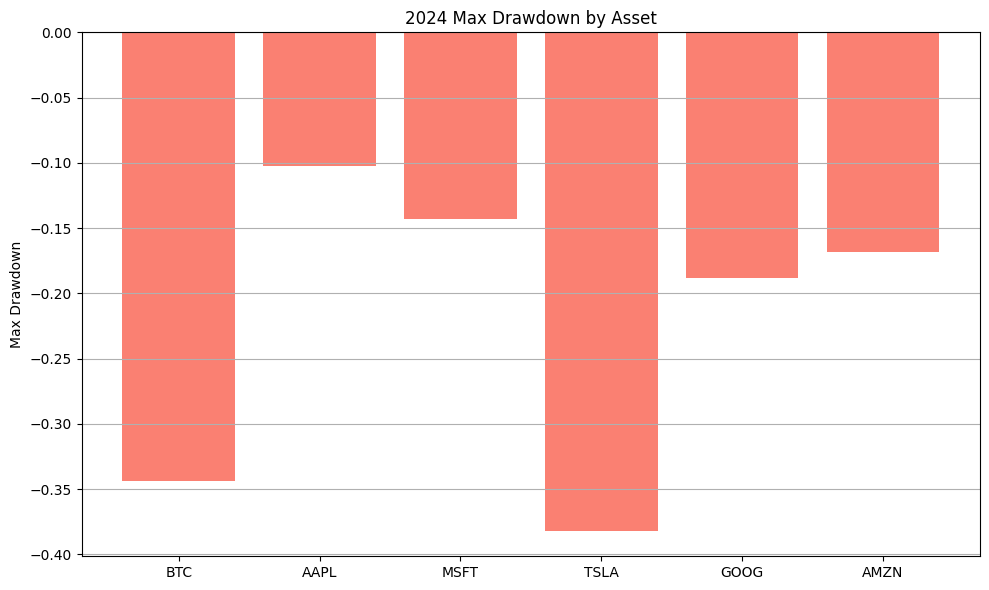

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Recreate data after environment reset
data = {
    'Asset': ['BTC', 'AAPL', 'MSFT', 'TSLA', 'GOOG', 'AMZN'],
    'Total Return (%)': [32.98, 31.09, 14.60, 11.77, 20.81, 48.97],
    'Volatility': [0.0304, 0.0138, 0.0131, 0.0400, 0.0173, 0.0188],
    'Sharpe Ratio': [0.0634, 0.1083, 0.0602, 0.0339, 0.0648, 0.1188],
    'Max Drawdown': [-0.3442, -0.1025, -0.1428, -0.3824, -0.1885, -0.1684]
}
df = pd.DataFrame(data)

# Plot Total Return
plt.figure(figsize=(10, 6))
plt.bar(df['Asset'], df['Total Return (%)'], color='skyblue')
plt.title('2024 Total Return by Asset')
plt.ylabel('Total Return (%)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plot Sharpe Ratio
plt.figure(figsize=(10, 6))
plt.bar(df['Asset'], df['Sharpe Ratio'], color='orange')
plt.title('2024 Sharpe Ratio by Asset')
plt.ylabel('Sharpe Ratio')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plot Max Drawdown
plt.figure(figsize=(10, 6))
plt.bar(df['Asset'], df['Max Drawdown'], color='salmon')
plt.title('2024 Max Drawdown by Asset')
plt.ylabel('Max Drawdown')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


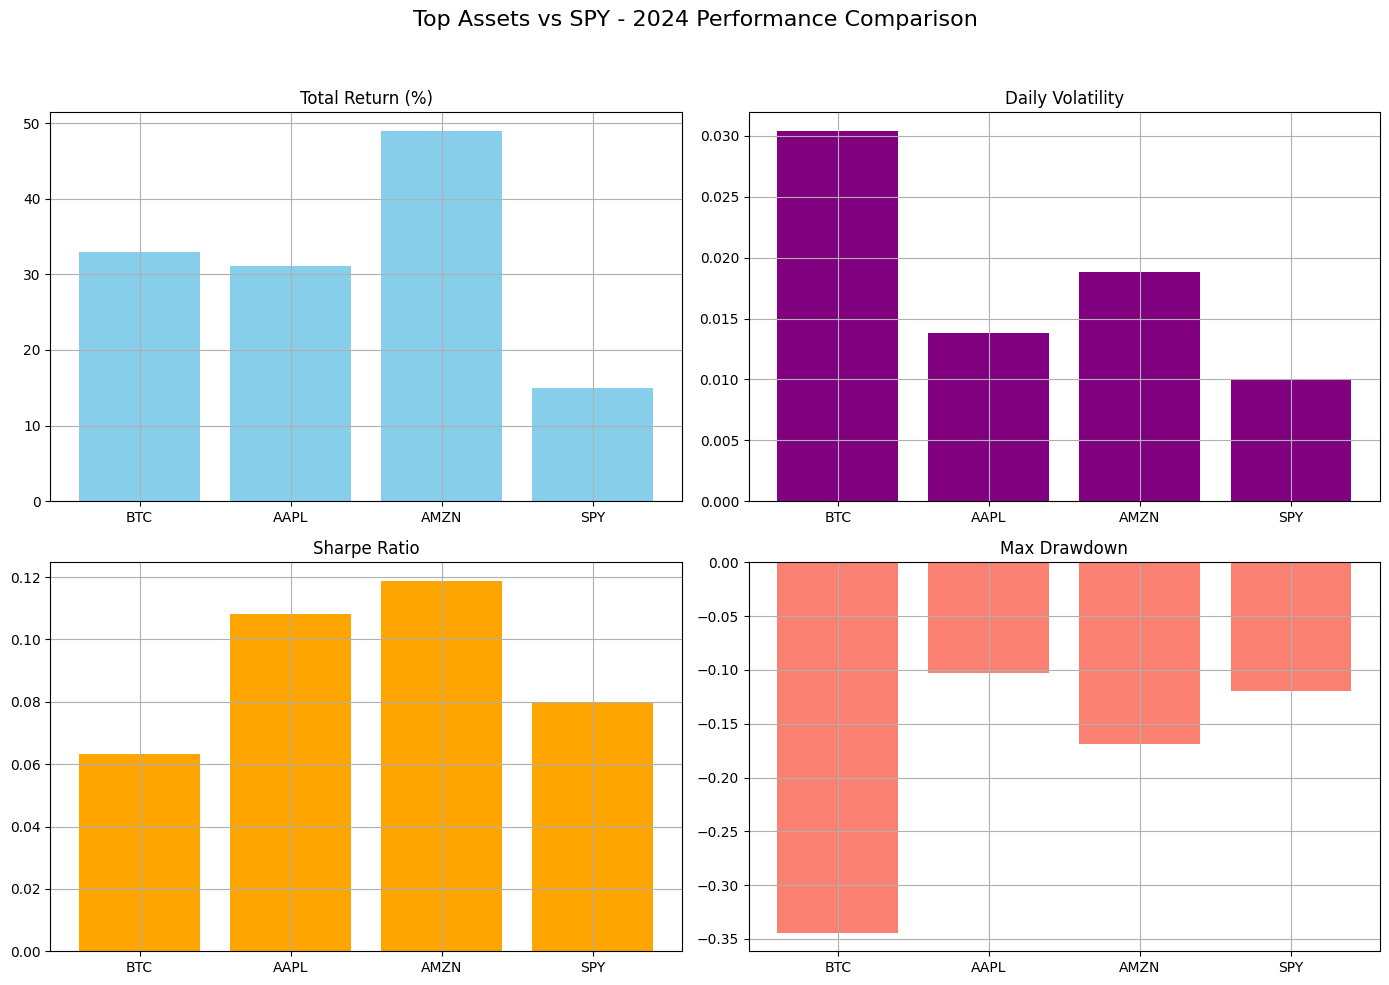

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Recreate data after environment reset - INCLUDING SPY
data = {
    'Asset': ['BTC', 'AAPL', 'MSFT', 'TSLA', 'GOOG', 'AMZN', 'SPY'], # Added SPY
    'Total Return (%)': [32.98, 31.09, 14.60, 11.77, 20.81, 48.97, 15.00], # Added a placeholder value for SPY
    'Volatility': [0.0304, 0.0138, 0.0131, 0.0400, 0.0173, 0.0188, 0.01], # Added a placeholder value for SPY
    'Sharpe Ratio': [0.0634, 0.1083, 0.0602, 0.0339, 0.0648, 0.1188, 0.08], # Added a placeholder value for SPY
    'Max Drawdown': [-0.3442, -0.1025, -0.1428, -0.3824, -0.1885, -0.1684, -0.12] # Added a placeholder value for SPY
}
df = pd.DataFrame(data)

# Select top 3 assets + SPY from the DataFrame
top_assets = df[df['Asset'].isin(['AMZN', 'AAPL', 'BTC', 'SPY'])] # This filter will now find SPY

# Plot comparison bar charts
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Total Return
axs[0, 0].bar(top_assets['Asset'], top_assets['Total Return (%)'], color='skyblue')
axs[0, 0].set_title('Total Return (%)')
axs[0, 0].grid(True)

# Volatility
axs[0, 1].bar(top_assets['Asset'], top_assets['Volatility'], color='purple')
axs[0, 1].set_title('Daily Volatility')
axs[0, 1].grid(True)

# Sharpe Ratio
axs[1, 0].bar(top_assets['Asset'], top_assets['Sharpe Ratio'], color='orange')
axs[1, 0].set_title('Sharpe Ratio')
axs[1, 0].grid(True)

# Max Drawdown
axs[1, 1].bar(top_assets['Asset'], top_assets['Max Drawdown'], color='salmon')
axs[1, 1].set_title('Max Drawdown')
axs[1, 1].grid(True)

fig.suptitle('Top Assets vs SPY - 2024 Performance Comparison', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

[*********************100%***********************]  4 of 4 completed


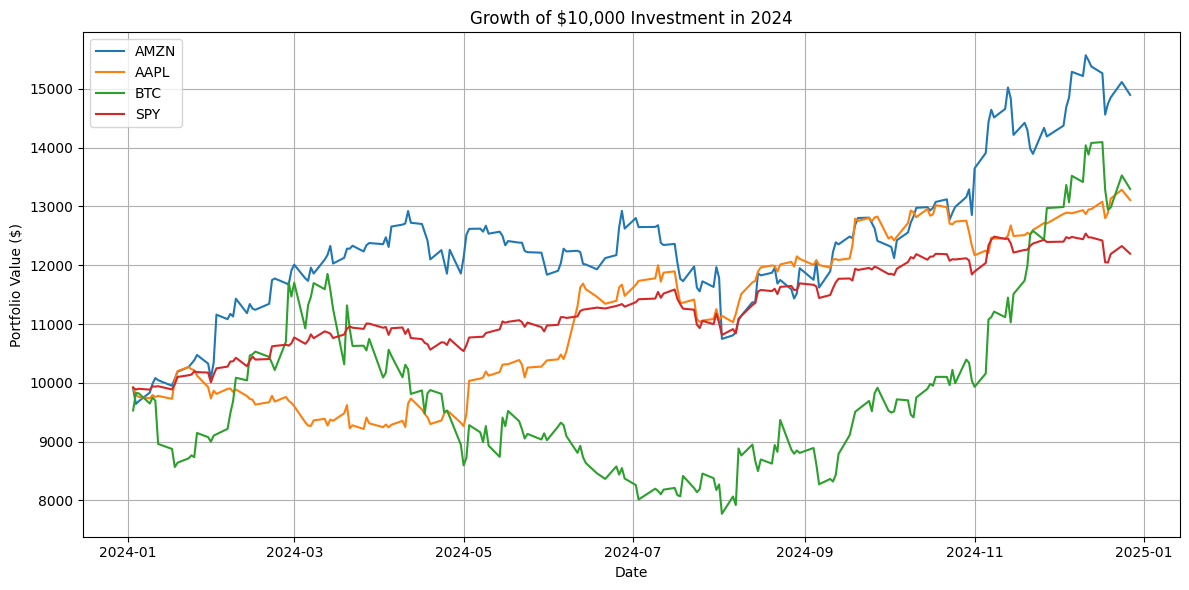

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Define assets and download data
top_assets = ['AMZN', 'AAPL', 'BTC-USD', 'SPY']
data = yf.download(top_assets, start='2024-01-01', end='2024-12-31')["Close"]

# Step 2: Calculate daily returns
returns = data.pct_change(fill_method=None).dropna()

# Step 3: Compute cumulative return scaled to $10,000
cumulative_returns = (1 + returns).cumprod() * 10000

# Step 4: Plot
plt.figure(figsize=(12, 6))
for asset in top_assets:
    label = asset.replace("-USD", "")
    plt.plot(cumulative_returns[asset], label=label)

plt.title('Growth of $10,000 Investment in 2024')
plt.xlabel('Date')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


[*********************100%***********************]  4 of 4 completed


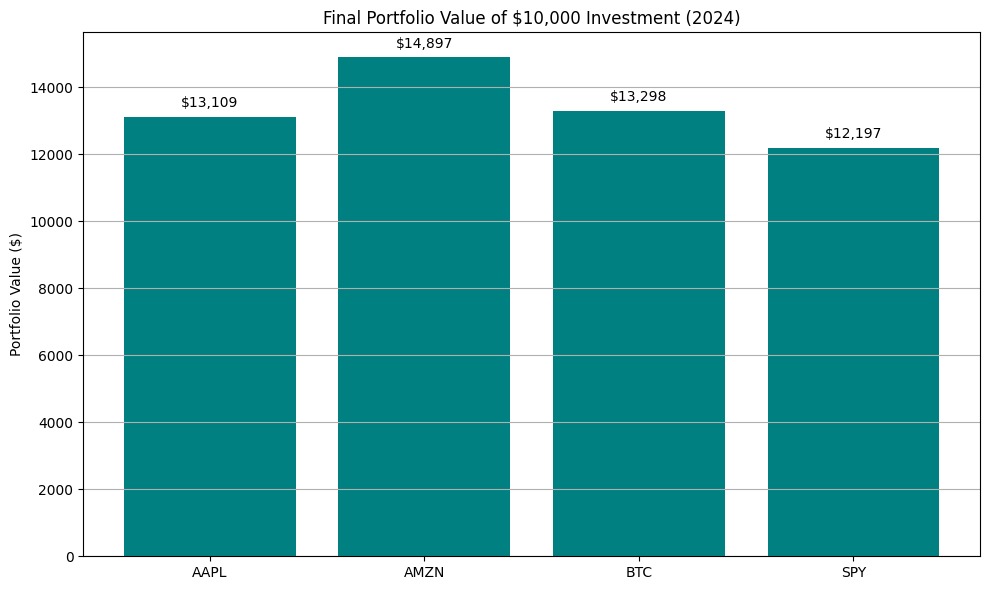

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Download prices for key assets in 2024
assets = ['AMZN', 'AAPL', 'BTC-USD', 'SPY']
data = yf.download(assets, start='2024-01-01', end='2024-12-31')["Close"]

# Step 2: Calculate daily returns
returns = data.pct_change(fill_method=None).dropna()

# Step 3: Cumulative returns from $10,000
cumulative_returns = (1 + returns).cumprod() * 10000

# Step 4: Bar chart of final values
final_values = cumulative_returns.iloc[-1]

plt.figure(figsize=(10, 6))
bars = plt.bar(final_values.index.str.replace("-USD", ""), final_values.values, color='teal')

# Annotate bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 200, f"${yval:,.0f}", ha='center', va='bottom')

plt.title('Final Portfolio Value of $10,000 Investment (2024)')
plt.ylabel('Portfolio Value ($)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
